<strong>Task 3:</strong> **Customer Segmentation
Description:
Segment customers based on tenure,
monthly charges, and contract type. Analyze
churn rates within these segments. Identify
high-value customers who are at risk of
churning and might need special attention.
Skills :                                                                                                                                          Segmentation techniques
Understanding of customer behavior
Churn analysis within segments
Identifying high-value customers.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('C://Users//ALWAYSRAMESH//Downloads//Telco_Customer_Churn_Dataset  (3).csv',header=0)

In [3]:
# Convert 'Churn' column to numeric (0 = No, 1 = Yes)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [4]:
features = ['tenure', 'MonthlyCharges']

In [5]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features + ['Contract']])

In [7]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(df_scaled)

In [8]:
# Analyze churn rate in each segment
churn_rates = df.groupby('Segment')['Churn'].mean() * 100
print("Churn Rate per Segment:\n", churn_rates)

Churn Rate per Segment:
 Segment
0     6.580645
1    46.827458
2    22.441918
Name: Churn, dtype: float64


In [9]:
high_value_risk = df[(df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)) & (df['Churn'] == 1)]
print("High-Value Customers at Risk of Churning:\n", high_value_risk[['customerID', 'tenure', 'MonthlyCharges', 'Contract']])

High-Value Customers at Risk of Churning:
       customerID  tenure  MonthlyCharges  Contract
5     9305-CDSKC       8           99.65         0
8     7892-POOKP      28          104.80         0
13    0280-XJGEX      49          103.70         0
26    6467-CHFZW      47           99.35         0
38    5380-WJKOV      34          106.35         0
...          ...     ...             ...       ...
6972  6664-FPDAC      56          111.95         1
6986  3976-BWUCK      30           94.10         0
6991  3585-ISXZP       8           95.65         0
7006  0093-XWZFY      40          104.50         0
7034  0639-TSIQW      67          102.95         0

[578 rows x 4 columns]


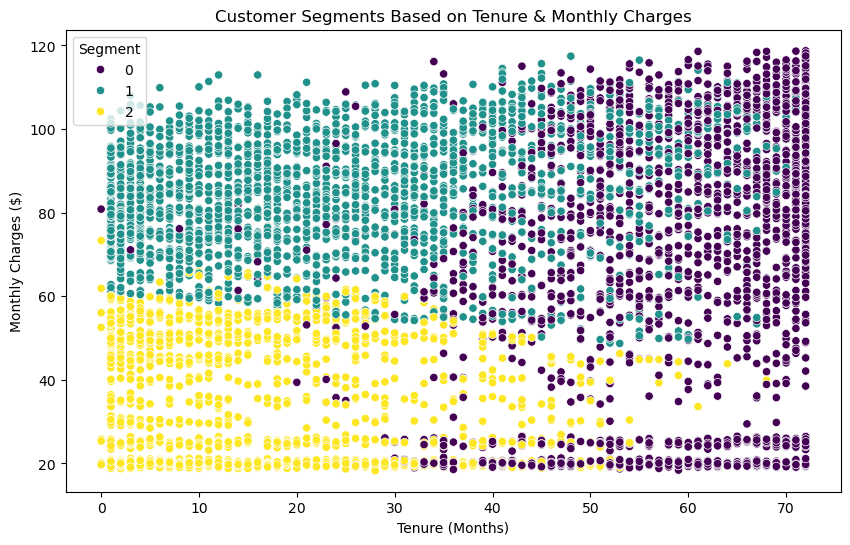

In [10]:
# Visualizing the segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Segment', palette='viridis')
plt.title("Customer Segments Based on Tenure & Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.show()

** Insights:
This groups customers into 3 segments based on tenure, charges & contract type
Churn rates per segment highlight which groups have higher risks
High-value customers at risk (paying more but likely to leave) are identified**